In [2]:
# imports
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision import models
import torch.nn as nn
from torch import optim

from datetime import datetime
import copy
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline


tensor([803])


NameError: name 'class_names' is not defined

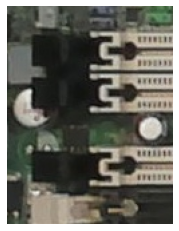

In [4]:
num_classes=2
# Carregando o modelo
device = torch.device('cpu')
model = models.resnet18(pretrained=False)

model.load_state_dict(torch.load("memoria_esquerda_classificacao.pth"),  strict=False)
model.classifier = nn.Linear(in_features=512, out_features=num_classes, bias=True)
model.eval()
model.to(device)

# Mantemos o transform utilizado para validação
transform = transforms.Compose([
        transforms.Resize((224,350)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

image = Image.open("C:/Users/erh/eduardo/Desktop_4/INE_visao_computacional/memoria_esquerda_splitted/val/esquerda_bom/11.png")
plt.imshow(np.array(image))
plt.grid(False)
plt.axis(False)
image = transform(image)
image = image[None,...]
image = image.float()#.cpu()#.cuda()#to(device)
with torch.no_grad():
    output = model(image)
_, predicted = torch.max(output, 1)
print(predicted)
answer = class_names[predicted]
plt.title(f"predicted: {answer}")
plt.show()